In [5]:
import splitfolders
import tensorflow as tf
from tensorflow.keras import Model
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
import scipy
from tensorflow.keras.preprocessing import image_dataset_from_directory 
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

In [11]:
import os


os.environ['CUDS_DEVICE_ORDER'] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '0'



gpus = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(gpus[0],True)
except:
    print("Failed")


Failed


In [6]:
import os
os.mkdir('dataset_for_plant_village')

In [8]:
os.mkdir(os.path.join('dataset_for_plant_village','train'))
os.mkdir(os.path.join('dataset_for_plant_village','test'))
os.mkdir(os.path.join('dataset_for_plant_village','val'))

In [2]:
dataset_path = 'dataset/archive/plantvillage dataset/color'
splitfolders.ratio(dataset_path,output='dataset_for_plant_village',seed=42,ratio=(0.70,0.20,0.10))

KeyboardInterrupt: 

In [2]:
train_dataset_path = 'dataset_for_plant_village/train'
test_dataset_path = 'dataset_for_plant_village/test'
val_dataset_path = 'dataset_for_plant_village/val'

In [3]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_dataset_path,target_size=(224,224),batch_size=30)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(val_dataset_path,target_size=(224,224),batch_size=20)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_dataset_path,target_size=(224,224))

Found 37997 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Found 5459 images belonging to 38 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

In [4]:
MobileNetV2_model = MobileNetV2(weights='imagenet',include_top=False)

x = MobileNetV2_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(128,activation='relu')(x)
predictions = Dense(38,activation='softmax')(x)

model = Model(inputs=MobileNetV2_model.input,outputs=predictions)

In [5]:
for layers in model.layers[:-5]:
    layers.trainable = False

In [6]:
optimizers = Adam(learning_rate=0.0001)
epochs = 8
model.compile(loss='categorical_crossentropy',optimizer=optimizers,metrics=['accuracy'])

In [13]:
model.fit(train_gen,validation_data=val_gen,epochs=epochs)

Epoch 1/8
 120/1267 [=>............................] - ETA: 2:10 - loss: 0.2778 - accuracy: 0.9219

KeyboardInterrupt: 

In [68]:
a = model.history['accuracy']
a

TypeError: 'History' object is not subscriptable

In [23]:
result = model.evaluate(test_gen)

171/171 [==============================] - 33s 187ms/step - loss: 0.1083 - accuracy: 0.9659


In [15]:
new_model = tf.keras.models.load_model('plant_village_model.h5')

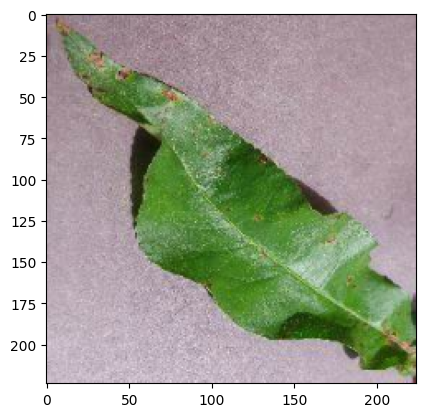

In [30]:
img = 'dataset_for_plant_village/peach_bactorial.jpeg'
a= cv2.imread(img)
inverted_img = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

resized_img = cv2.resize(inverted_img,(224,224))
plt.imshow(resized_img)

In [ ]:
test_img = image.load_img(inverted_img,target_size=(224,224))

In [31]:

arr_img = image.img_to_array(resized_img)
arr_img = np.expand_dims(arr_img,axis=0)
arr_img /= 255.0

In [7]:
import os

labels = os.listdir('dataset_for_plant_village/test/')
labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [32]:
predictions = new_model.predict(arr_img)
predicted_class = labels[np.argmax(predictions)]
print(predicted_class)

1/1 [==============================] - 0s 35ms/step
Peach___Bacterial_spot


In [45]:
model.save('plant_village_model.h5')

In [2]:
# convert keras model to tflite
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [4]:
model = load_model("plant_village_model.h5")

In [3]:
from tensorflow.keras.models import load_model
model = load_model("plant_village_model.h5")

TF_LITE_MODEL_FILE_NAME = "mobilenet_agricare.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# or using another method

# Save the model.
with open('tflite_model_another2.tflite', 'wb') as f:
  f.write(tflite_model)



KeyboardInterrupt: 

In [8]:
with open('labels.txt','w') as f:
  for i,label in enumerate(labels):
    f.write(f"{i} {label}\n")